<a href="https://colab.research.google.com/github/JDM-ULL-93/Practica_TID/blob/master/5_Perceptron_Simple_y_Multicapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Índice

[Volver al índice](https://colab.research.google.com/github/JDM-ULL-93/Practica_TID/blob/master/Indice.ipynb)

# Introducción

Nuestros datos representan el conjunto de datos medidos por los 8 sensores del producto "[MYO armband](https://www.youtube.com/watch?v=jOEcsNmTk7g)"


Se trata de 8 sensores que individualmente miden los mismos músculos 8 veces en intervalos de 5 ms. Cada sensor recoge los grados en los que se encuentra girado el músculo esquelético. Este valor varía en un rango entre **[-128º,127º]** cada fila recoge 40ms de estas mediciones, por lo tanto, cada fila recoge 8 mediciones consecutivas de los 8 sensores, de forma que el formato de cada fila es la siguiente:​

    [8sensores][8sensores][8sensores][8sensores][8sensores][8sensores][8sensores][8sensores]​

Es decir, tenemos 64 predictores y una última variable que es la clase o el atributo a predecir. Según los valores de las 8 mediciones consecutivas de los 8 sensores sobre el musculo, se clasificará en una de las 4 gestos posibles identificados de la siguiente forma:
```c#
Enum {
  Roca = 0,
  Tijeras = 1,
  Papel = 2,
  Ok = 3
}
```
Esta clase corresponde con el tipo de gesto realizándose en posición fija en un lapso de tiempo de duración 40 ms.

Por lo tanto, el formato final de nuestro conjunto de datos es:​

    [8sensores][8sensores][8sensores][8sensores][8sensores][8sensores][8sensores][8sensores][Gesto]​

Esto es cada fila. Nuestro conjunto de datos son 11678 filas. 

# Objetivo

Crear y entrenar un clasificador preciso capaz de diferenciar y reconocer los gestos ejecutados con un margen de error de 5%​. 

En este cuaderno en específico, probaremos la efectividad de un Perceptrón Simple y un Perceptrón Multicapa

# Carga de librerías

Se utilizan las librerías de numpy, matplotlib y sklearn.

* **Numpy** es una librería para la computación científica que, en este caso, usaremos para cálculos de operaciones entre matrices.
* **Matplotlib** es una librería para generación de gráficos, útil para visualizar nuestro trabajo más adelante.
* **pandas** librería que contiene, entre otras muchas cosas, una utilidad para leer directamente de un csv junto con utilidades para visualización.
* **sklearn** es una librería que contiene diferentes algoritmos de aprendizaje para nuestros futuros modelos de redes neuronales.




In [0]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# Carga y visualización de datos

Empezamos cargando nuestro datasheet a memoria . Este datasheet ha sido sacado de la página "Kaggle" y puede encontrarse en el siguiente enlace:

https://www.kaggle.com/kyr7plus/emg-4

El datasheet que se carga es el producto de unir los cuatro conjuntos de datos (cada uno por cada tipo de gesto) en uno solo.

In [0]:
#gesturesType = {
#  'names' : ('MR1S1','MR1S2','MR1S3','MR1S4','MR1S5','MR1S6','MR1S7','MR1S8','MR2S1','MR2S2','MR2S3','MR2S4','MR2S5','MR2S6','MR2S7','MR2S8','MR3S1','MR3S2','MR3S3','MR3S4','MR3S5','MR3S6','MR3S7','MR3S8','MR4S1','MR4S2','MR4S3','MR4S4','MR4S5','MR4S6','MR4S7','MR4S8','MR5S1','MR5S2','MR5S3','MR5S4','MR5S5','MR5S6','MR5S7','MR5S8','MR6S1','MR6S2','MR6S3','MR6S4','MR6S5','MR6S6','MR6S7','MR6S8','MR7S1','MR7S2','MR7S3','MR7S4','MR7S5','MR7S6','MR7S7','MR7S8','MR8S1','MR8S2','MR8S3','MR8S4','MR8S5','MR8S6','MR8S7','MR8S8','Class') 
#  ,'formats' : (float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int)
#  }

#gestures = np.loadtxt("/content/all.csv", delimiter=",")
gestures = read_csv("/content/cleanedAll.csv", delimiter=",")
#print(gestures.shape)

Mostramos una matriz de diagramas de densidad, lo que nos permitirá evaluar a simple vista la distribución de nuestros datos.

(10454, 65)


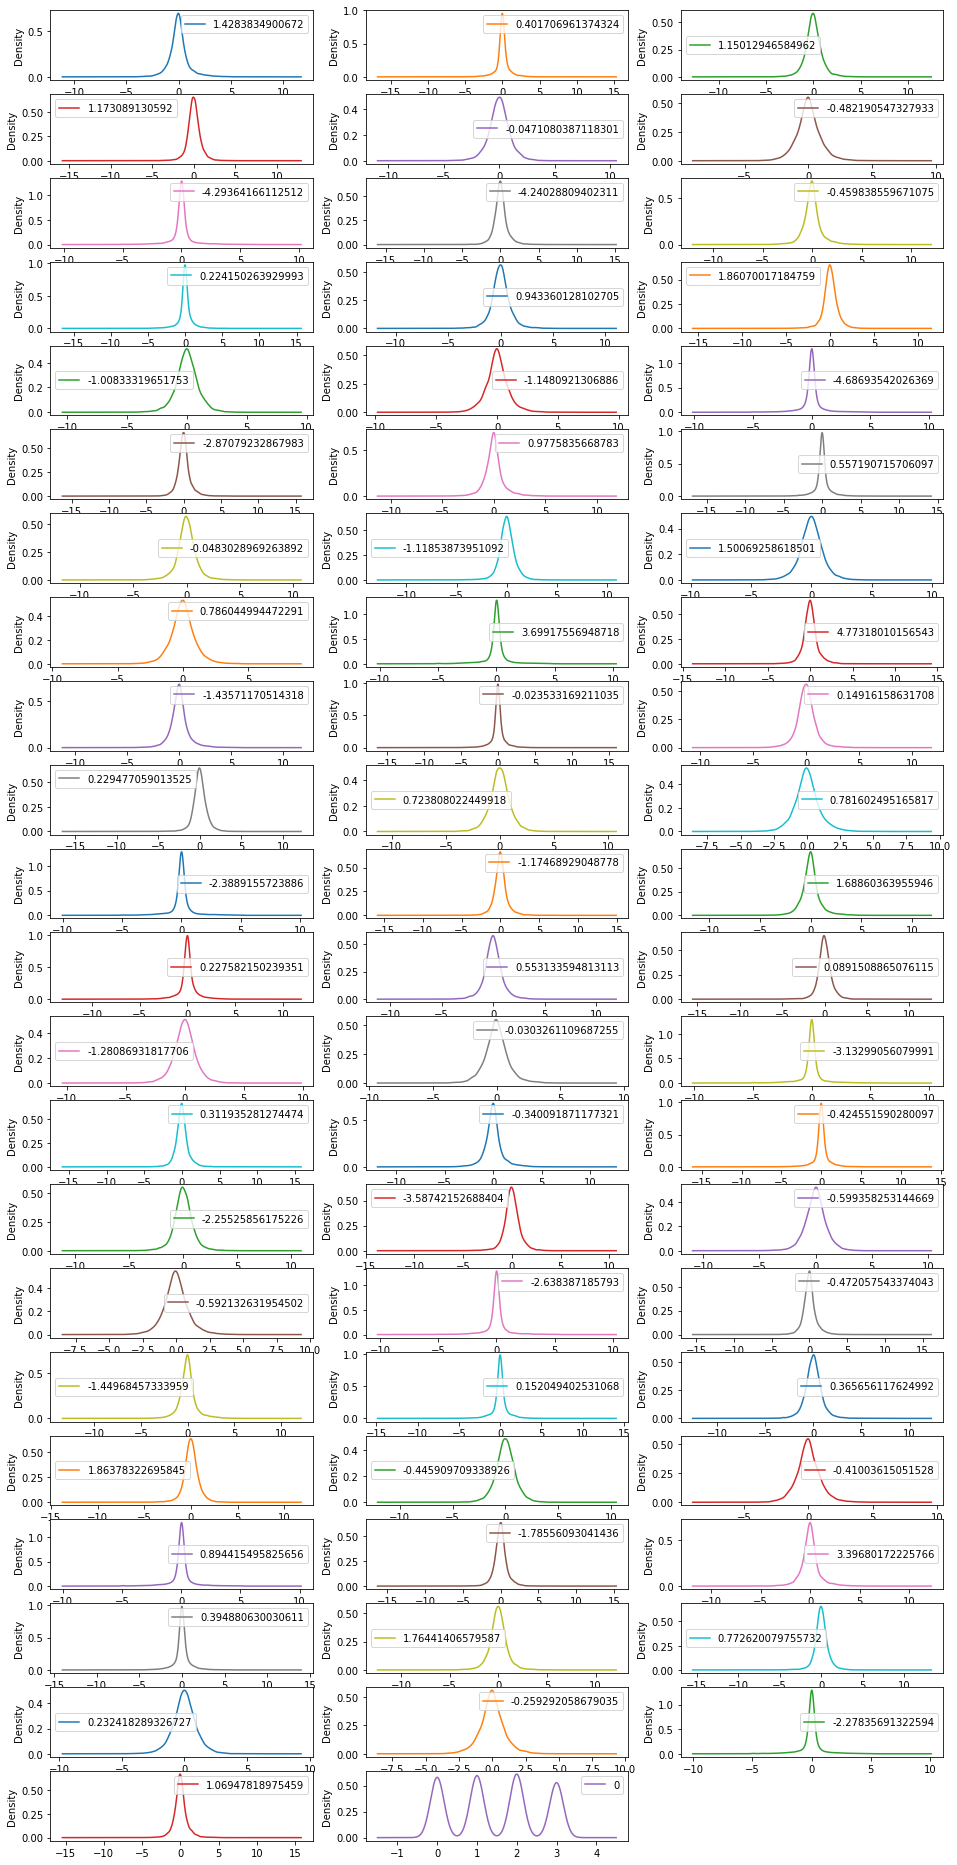

In [0]:
print(gestures.shape)
gestures.plot(kind='density', subplots=True, layout=(65,3), sharex=False, figsize=(16, 100))
#gestures.plot(kind='box', subplots=True, layout=(65,3), sharex=False, sharey=False,figsize=(20, 100))
plt.show()

# Creando conjuntos de entrenamiento, validación y test

Tras cargar y visualizar nuestros datos, procedemos a prepararlos para ser procesados posteriormente por el Perceptrón Simple y el Perceptrón Multicapa diviendo nuestra matriz inicial contenida en 'gestures' en 3 subconjuntos, uno de entrenamiento y otro de validación que a su vez se dividirá en 2, validación de nuevo y test. ¿Por qué dividimos el conjunto de validación en 2? Porque, más adelante, en el Perceptron Multicapa, de forma indirecta, lo usamos como si fuese un conjunto de entrenamiento para optimizar los parámetros de nuestro perceptrón multicapa, por lo tanto, se convierten en datos viciados que ya no sirven para probar la precisión de nuestro modelo.

Conviene recalcar varias cosas:
* input_xxx : Se corresponde con el input de datos de nuestra red neuronal tipo Perceptrón simple (una capa de entrada y otra de salida), por lo tanto, contiene toda la matrix 'gestures' pero eliminando la última columna.
* target_xxx : Básicamente es lo contrario a input, contiene solo todas las filas de la última columna y será usada siempre para validar la precisión del modelo.
* _xxx : Indica si se corresponde al subcojunto de entrenamiento (*_train*), de validación (*_valid*) o test (*_test*).

In [0]:
train_size = 0.5 #50%
test_size = 1 - train_size
#patterns_input = gesturesNormalized[:gesturesNormalized.size-1]
patterns_input = gestures.to_numpy()[:, :-1] #Obtenemos todas las filas y columnas (excepto la última) 
patterns_target = gestures.to_numpy()[:, -1]#gesturesNormalized[:, -1] #Obtenemos todas las filas pero solo de la ultima columna que contiene el tipo de gesto
input_train, input_valid, target_train, target_valid = train_test_split(patterns_input, patterns_target, train_size=train_size, test_size=test_size, random_state=0, shuffle=True)
print("<Conjunto_Input_Entrenamiento>.shape = ",input_train.shape)
print("<Conjunto_ValidaciónOutput_Entrenamiento>.shape = ",target_train.shape)

input_test, input_valid, target_test, target_valid = train_test_split(input_valid, target_valid, train_size=train_size,test_size=test_size, random_state=0, shuffle=True)

print("<Conjunto_Input_Validación>.shape = ",input_valid.shape)
print("<Conjunto_ValidaciónOutput_Validación>.shape = ",target_valid.shape)
print("<Conjunto_Input_Test>.shape = ",input_test.shape)
print("<Conjunto_ValidaciónOutput_Test>.shape = ",target_test.shape)

<Conjunto_Input_Entrenamiento>.shape =  (5227, 64)
<Conjunto_ValidaciónOutput_Entrenamiento>.shape =  (5227,)
<Conjunto_Input_Validación>.shape =  (2614, 64)
<Conjunto_ValidaciónOutput_Validación>.shape =  (2614,)
<Conjunto_Input_Test>.shape =  (2613, 64)
<Conjunto_ValidaciónOutput_Test>.shape =  (2613,)


# Resultados iniciales Perceptrón Simple

Empezamos probando nuestros datos frente al Perceptrón Simple.

In [0]:
max_iter = 120
per = Perceptron(max_iter=max_iter, shuffle=False, random_state=0, verbose=True)
per.fit(input_train, target_train)
predict_train = per.predict(input_train)
predict_valid = per.predict(input_valid)
print("Train accuracy: %.3f%%" % (accuracy_score(target_train, predict_train) * 100))
print("Valid accuracy: %.3f%%" % (accuracy_score(target_valid, predict_valid) * 100))

-- Epoch 1
Norm: 42.85, NNZs: 64, Bias: -20.000000, T: 5227, Avg. loss: 10.622292
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 43.83, NNZs: 64, Bias: -18.000000, T: 10454, Avg. loss: 10.712174
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 48.48, NNZs: 64, Bias: -15.000000, T: 15681, Avg. loss: 10.592113
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 46.80, NNZs: 64, Bias: -18.000000, T: 20908, Avg. loss: 10.681279
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 47.00, NNZs: 64, Bias: -13.000000, T: 26135, Avg. loss: 10.467900
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 47.98, NNZs: 64, Bias: -17.000000, T: 31362, Avg. loss: 10.516229
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 44.39, NNZs: 64, Bias: -18.000000, T: 36589, Avg. loss: 10.427888
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 42.90, NNZs: 64, Bias: -16.000000, T: 41816, Avg. loss: 10.785468
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 44.91, NNZs: 64, Bias: -23.000000, T: 47

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished


Observamos como la precisión final frente a nuestro conjunto de validación es del ~32.753%, es obvio que el perceptrón simple y su función lineal es totalmente incapaz de crear un modelo de red neuronal preciso para nuestro problema. A lo mejor con un preprocesado más eficiente (por ejemplo, un análisis de componentes principales y posterior reducción de variables) podríamos mejorar este resultado.

# Conclusión Perceptrón Simple

El perceptrón simple está compuesto solamente de dos capas, una de entrada y otra de salida, por lo tanto, solo es capaz de representar regiones del plano bajo la recta, por eso no puede representar nuestra función con forma de electrocardiograma, que es bastante irregular.


# Resultados iniciales Perceptrón Multicapa 

El siguiente paso es probar con el Perceptrón Multicapa. Existiendo una ecuación y = f(x1,x2,...,x64), que describe como x(i) las entradas e 'y' la clase a la que se corresponde, a diferencia del perceptrón simple que solo puede intentar acotarla mediante la ecuación de una recta, el perceptrón multicapa y su adición de capas ocultas permite añadir más variables a la ecuación que acota f(x1,x2,...,x64) pudiendo acercarse más a ella, aumentando la precisión del modelo Perceptrón.  


Lo que definimos a continuación es una función que se encargará de aplicarle el algoritmo de aprendizaje encargado de ajustar pesos al perceptrón multicapa que le pasamos (*mlp*). Este algoritmo emplea el conjunto de validación como parte del entrenamiento, por lo tanto, *'vicia'* el objetivo por el que este subconjunto de los datos fue dividido, y por ello es que anteriormente creamos un tercer subconjunto llamado *'test'*

In [0]:
def MLP_train_valid(mlp, input_train, target_train, input_valid, target_valid, max_iter, valid_cycles, verbose):
   """
   Train and valid MLP every valid_cycles iterations
   """
   classes  = np.unique(target_train)
   loss_valid = []
   for i in range(int(max_iter/valid_cycles)):
       for j in range(valid_cycles):
           out = mlp.partial_fit(input_train, target_train, classes)
           # Calculate loss function of valid set
       last_lost_valid = log_loss(target_valid, mlp.predict_proba(input_valid))
       loss_valid.append(last_lost_valid)
       if verbose:
           print("Iteration %d, train loss = %.8f, valid loss = %.8f" %(mlp.n_iter_, mlp.loss_, last_lost_valid))
       if early_stopping and (i > 0) and (last_lost_valid > loss_valid[-2]): # Early stopping
           if verbose:
               print("Early stopping: Validation score did not improve")
           break
   if verbose: print(out)
   
   if verbose:
       # Visualizing the Cost Function Trajectory
       # (https://sdsawtelle.github.io/blog/output/week4-andrew-ng-machine-learning-with-python.html#Visualizing-the-Cost-Function-Trajectory)
       print("Visualizing the Cost Function Trajectory")
       plt.plot(range(1, len(mlp.loss_curve_)+1), mlp.loss_curve_, label='Train loss')
       plt.plot(range(valid_cycles,len(loss_valid)*valid_cycles+valid_cycles,valid_cycles), loss_valid, '-o', label='Valid loss')
       plt.xlabel('number of iterations')
       plt.ylabel('loss function')
       plt.legend(loc='upper right')
       plt.show()

Creamos nuestro MLP y se lo pasamos a la función creada anteriormente

Iteration 1, loss = 1.44881422
Iteration 2, loss = 1.24663483
Iteration 3, loss = 1.12286866
Iteration 4, loss = 1.01906760
Iteration 5, loss = 0.92576438
Iteration 5, train loss = 0.92576438, valid loss = 0.92675709
Iteration 6, loss = 0.84043927
Iteration 7, loss = 0.76334510
Iteration 8, loss = 0.69420045
Iteration 9, loss = 0.63297784
Iteration 10, loss = 0.57915984
Iteration 10, train loss = 0.57915984, valid loss = 0.62092410
Iteration 11, loss = 0.53190743
Iteration 12, loss = 0.49027587
Iteration 13, loss = 0.45348061
Iteration 14, loss = 0.42095613
Iteration 15, loss = 0.39198700
Iteration 15, train loss = 0.39198700, valid loss = 0.46112354
Iteration 16, loss = 0.36611225
Iteration 17, loss = 0.34291242
Iteration 18, loss = 0.32200916
Iteration 19, loss = 0.30303060
Iteration 20, loss = 0.28566478
Iteration 20, train loss = 0.28566478, valid loss = 0.37434677
Iteration 21, loss = 0.26981696
Iteration 22, loss = 0.25535269
Iteration 23, loss = 0.24208697
Iteration 24, loss = 0

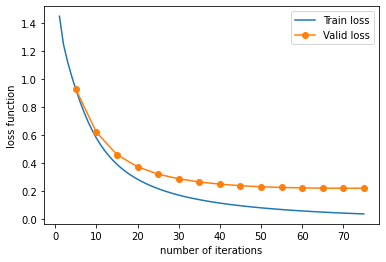

In [0]:
n_hidden = 64 #60
max_iter = 300
learning_rate_init = 0.001
valid_cycles = 5
early_stopping = True
mlp = MLPClassifier(hidden_layer_sizes=(n_hidden,), learning_rate_init=learning_rate_init, shuffle=False, random_state=0, verbose=True)
MLP_train_valid(mlp, input_train, target_train, input_valid, target_valid, max_iter, valid_cycles, True)

In [0]:
predict_train = mlp.predict(input_train)
predict_valid = mlp.predict(input_valid)
print("Train accuracy: %.3f%%" % (accuracy_score(target_train, predict_train) * 100))
print("Valid accuracy: %.3f%%" % (accuracy_score(target_valid, predict_valid) * 100))
print("Train confusion matrix:")
print(confusion_matrix(target_train, predict_train))
print("Valid confusion matrix:")
print(confusion_matrix(target_valid, predict_valid))
print("Train classification report:")
print(classification_report(target_train, predict_train))
print("Valid classification report:")
print(classification_report(target_valid, predict_valid))

Train accuracy: 99.751%
Valid accuracy: 92.464%
Train confusion matrix:
[[1304    0    0    0]
 [   0 1375    0    1]
 [   0    2 1365    5]
 [   0    5    0 1170]]
Valid confusion matrix:
[[623   8  29   3]
 [  1 630   4  20]
 [ 15  22 622  40]
 [  2  41  12 542]]
Train classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1304
         1.0       0.99      1.00      1.00      1376
         2.0       1.00      0.99      1.00      1372
         3.0       0.99      1.00      1.00      1175

    accuracy                           1.00      5227
   macro avg       1.00      1.00      1.00      5227
weighted avg       1.00      1.00      1.00      5227

Valid classification report:
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96       663
         1.0       0.90      0.96      0.93       655
         2.0       0.93      0.89      0.91       699
         3.0       0.90 

Observamos que, comparado al Perceptrón Simple, el Perceptrón Multicapa es mucho mas capaz de acotar esa ecuación *y = f(x1,x2,...,x64)* que relaciona las entradas(valores de músculos medidos por sensor) con el tipo de gesto usado. Tenemos una precisión del *92.464%* para el conjunto de validación. Sin embargo, este valor todavía tienen margen para ser mejorado.

# Optimización ratio de aprendizaje
Previamente utilizamos un ratio de aprendizaje arbitario.Para acelerar la convergencia de nuestro MLP , una solución posible es buscar otro ratio de aprendizaje más óptimo.

In [0]:
tests_learning_rate_init = [0.001, 0.005, 0.01, 0.05, 0.1]
activation = 'relu'
random_state = 0
#now = datetime.now()
loss_curves =  []
for lr in tests_learning_rate_init:
   mlp = MLPClassifier(hidden_layer_sizes=(n_hidden,), learning_rate_init=lr, shuffle=False, random_state=random_state, verbose=False, activation=activation)
   MLP_train_valid(mlp, input_train, target_train, input_valid, target_valid, max_iter, valid_cycles, False)
   loss_curves.append(mlp.loss_curve_)

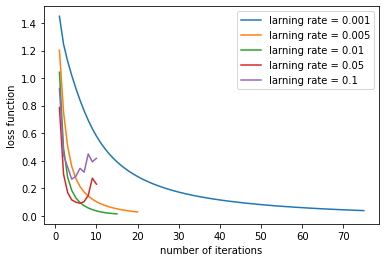

In [0]:
for (lr, loss_curve) in zip(tests_learning_rate_init, loss_curves):
   plt.plot(range(1, len(loss_curve)+1), loss_curve, label='larning rate = ' + str(lr))
plt.xlabel('number of iterations')
plt.ylabel('loss function')
plt.legend(loc='upper right')
plt.show()


Vemos que el más estable es el "learning rate" de 0.005, puesto que en solo 20 iteraciones ha reducido la variación de error al mininimo de la gráfica (y por ello que 0.01 no sea mejor que 0.005, porque llega antes pero permite ajustar menos el error).

# Optimización arquitectura
Previamente tambien definimos un número arbitrario de nodos ocultos igual al número de variables/inputs de nuestro modelo (64), pero no sabemos si es el adecuado. Por lo tanto, lo siguiente que realizaremos sera tratar de mejorar la precisión de nuestro MLP buscando un número de nodos ocultos más óptimo.

In [0]:
from datetime import datetime
#tests_n_hidden = [ 200]
tests_n_hidden = [180, 190,195, 200, 205, 210, 220]
n_reps = 10
activation = 'relu'
# activation = 'logistic'
learning_rate_init = 0.005
now = datetime.now()
best_mlp = []
best_acc = 0.0
accs_train = []
accs_valid = []
for n_hidden in tests_n_hidden:
   max_acc_train = max_acc_valid = 0.0
   for random_state in range(n_reps):
       mlp = MLPClassifier(hidden_layer_sizes=(n_hidden,), learning_rate_init=learning_rate_init, shuffle=False, random_state=random_state, verbose=False, activation=activation)
       MLP_train_valid(mlp, input_train, target_train, input_valid, target_valid, max_iter, valid_cycles, False)
       
       acc_train = accuracy_score(target_train, mlp.predict(input_train))
       acc_valid = accuracy_score(target_valid,mlp.predict(input_valid))
       print("Seed = %d, train acc = %.8f, valid acc = %.8f, iterations = %d" % (random_state, acc_train, acc_valid, len(mlp.loss_curve_)))
       if (max_acc_valid < acc_valid):
           max_acc_valid = acc_valid
           max_acc_train = acc_train
           if (acc_valid > best_acc):
               best_acc = acc_valid
               best_mlp = mlp
   accs_train.append(max_acc_train)
   accs_valid.append(max_acc_valid)
   print("Number hidden units = %i, train acc = %.8f, max valid acc = %.8f" % (n_hidden, max_acc_train, max_acc_valid))
print("Number of seconds for training: %d" % (datetime.now() - now).total_seconds())
print("Best MLP valid accuracy: %.8f%%" % (best_acc * 100))
print("Best MLP: ", best_mlp)

Seed = 0, train acc = 1.00000000, valid acc = 0.93802601, iterations = 15
Seed = 1, train acc = 1.00000000, valid acc = 0.93917368, iterations = 20
Seed = 2, train acc = 1.00000000, valid acc = 0.94452946, iterations = 20
Seed = 3, train acc = 1.00000000, valid acc = 0.94261668, iterations = 15
Seed = 4, train acc = 1.00000000, valid acc = 0.94185157, iterations = 15
Seed = 5, train acc = 1.00000000, valid acc = 0.93802601, iterations = 15
Seed = 6, train acc = 1.00000000, valid acc = 0.93917368, iterations = 20
Seed = 7, train acc = 1.00000000, valid acc = 0.93840857, iterations = 15
Seed = 8, train acc = 1.00000000, valid acc = 0.93573068, iterations = 15
Seed = 9, train acc = 1.00000000, valid acc = 0.93879112, iterations = 20
Number hidden units = 180, train acc = 1.00000000, max valid acc = 0.94452946
Seed = 0, train acc = 1.00000000, valid acc = 0.94452946, iterations = 20
Seed = 1, train acc = 1.00000000, valid acc = 0.94070390, iterations = 15
Seed = 2, train acc = 1.00000000, 

Se observa que el mejor clasificador cuenta de 200 nodos ocultos. Observémoslo gráficamente

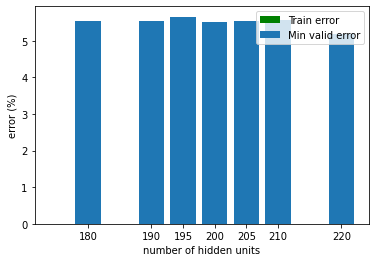

In [0]:
width = 4
plt.bar(np.array(tests_n_hidden) - width, 100 *(1- np.array(accs_train)), color='g', width=width, label='Train error')
plt.bar(np.array(tests_n_hidden), 100 *(1- np.array(accs_valid)), width=width, label='Min valid error')
plt.xlabel('number of hidden units')
plt.ylabel('error (%)')
plt.xticks(np.array(tests_n_hidden), tests_n_hidden)
plt.legend(loc='upper right')
plt.show()


# Resultados finales mejor MLP
Con el mejor MLP obtenido con los parámetros óptimos calculados anteriormente calculamos la precisión y las matrices de confusión para cada subconjunto preparado (entrenamiento, validación y test).

In [0]:
predict_train = best_mlp.predict(input_train)
predict_valid = best_mlp.predict(input_valid)
predict_test = best_mlp.predict(input_test)
print("Train accuracy: %.3f%%" % (accuracy_score(target_train, predict_train) * 100))
print("Valid accuracy: %.3f%%" % (accuracy_score(target_valid, predict_valid) * 100))
print("Test accuracy: %.3f%%" % (accuracy_score(target_test, predict_test) * 100))
print("Train confusion matrix:")
print(confusion_matrix(target_train, predict_train))
print("Valid confusion matrix:")
print(confusion_matrix(target_valid, predict_valid))
print("Test confusion matrix:")
print(confusion_matrix(target_test, predict_test))
print("Train classification report:")
print(classification_report(target_train, predict_train))
print("Valid classification report:")
print(classification_report(target_valid, predict_valid))
print("Test classification report:")
print(classification_report(target_test, predict_test))

Train accuracy: 100.000%
Valid accuracy: 94.797%
Test accuracy: 93.992%
Train confusion matrix:
[[1304    0    0    0]
 [   0 1376    0    0]
 [   0    0 1372    0]
 [   0    0    0 1175]]
Valid confusion matrix:
[[631   4  26   2]
 [  0 635   1  19]
 [  2  11 649  37]
 [  0  30   4 563]]
Test confusion matrix:
[[622   4  24   1]
 [  0 642   4  15]
 [  5  13 625  44]
 [  2  34  11 567]]
Train classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1304
         1.0       1.00      1.00      1.00      1376
         2.0       1.00      1.00      1.00      1372
         3.0       1.00      1.00      1.00      1175

    accuracy                           1.00      5227
   macro avg       1.00      1.00      1.00      5227
weighted avg       1.00      1.00      1.00      5227

Valid classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97       663
        

Podemos observar cómo la precisión del modelo pasa de *99.751%* a *100%* de precisión para el conjunto de entrenamiento. Una variación de *+0.22%*

De *92.464%* a *94.797%* para el conjunto de validación. Una variación del *+2.027%*

Por último, de *92.464%* a *93.992%* si comparamos la precisión para el conjunto de validación de nuestro primer Perceptrón MLP con la precisión para el conjunto de test para el Perceptrón MLP más óptimo. Una variación del *+1.528%*, con lo cual, podemos afirmar que nuestro modelo mejora su precisión para conjuntos de datos no viciados por el proceso de aprendizaje.

Posteriormente calculamos y visualizamos las curva ROC para el subconjunto Test:

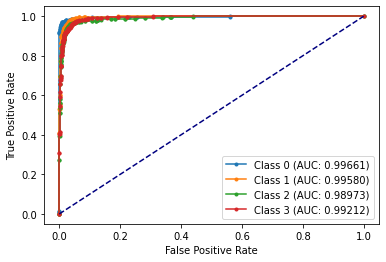

In [0]:
mlp_probs = mlp.predict_proba(input_test)
classes  = np.unique(target_test)
mlp_auc = []
mlp_fpr = []
mlp_tpr = []
for cla in classes:
  cla = int(cla)
  mlp_auc.append(roc_auc_score(target_test==cla, mlp_probs[:,cla]))
  fpr, tpr, _ = roc_curve(target_test==cla, mlp_probs[:,cla])
  mlp_fpr.append(fpr)
  mlp_tpr.append(tpr)

for cla in classes:
  cla = int(cla)
  # plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
  plt.plot(mlp_fpr[cla], mlp_tpr[cla], marker='.', label='Class %d (AUC: %.5f)' % (cla, mlp_auc[cla]))

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()



Esto nos permite ver que nuestro modelo tiene un mayor índice de falsos positivos (es decir, errores) en el gesto de tipo 2, con una precisión de *98.860%*

A continuación mostramos algunas filas donde se da el falso positivo:

In [0]:
print(predict_test)
print(predict_test.shape)

gesture_test = np.column_stack( (input_test, target_test))
max_rows = 10
count = 0
rowCount = 0
for row in gesture_test:
  rowCount = rowCount +1
  if max_rows == count:
    break
  if predict_test[count] != row[-1]:
    print("[Fila",rowCount ,"]Se predijo : ", int(predict_test[count]), " . Era : ",int(row[-1]),  )
    count = count+1


[1. 1. 1. ... 1. 1. 2.]
(2613,)
[Fila 5 ]Se predijo :  1  . Era :  2
[Fila 6 ]Se predijo :  1  . Era :  3
[Fila 7 ]Se predijo :  1  . Era :  0
[Fila 8 ]Se predijo :  1  . Era :  0
[Fila 9 ]Se predijo :  2  . Era :  3
[Fila 10 ]Se predijo :  3  . Era :  2
[Fila 11 ]Se predijo :  0  . Era :  3
[Fila 12 ]Se predijo :  0  . Era :  3
[Fila 13 ]Se predijo :  3  . Era :  0
[Fila 15 ]Se predijo :  2  . Era :  1


# Conclusión Perceptrón Multicapa

Como ya se ha explicado en el perceptrón simple, el problema era la región del plano que podía representar bajo una recta, problema que se puede solucionar con la adición de más capas (ocultas) y eso es el perceptrón multicapa. Gracias a ello se consigue una precisión frente al conjunto de validación (test) del ~94%. Muy cercano a nuestro mejor clasificador (95%). Posiblemente con un ajuste de hiper-parámetros más exhaustivo, este modelo podría superarlo.